In [4]:
import Pkg

Pkg.activate("..")

  Activating project at `~/research/xaqlab/ergm.jl`


# Overview

As suggested by Dr. Schweinberger, ERGMs which are restricted to only "local" interactions (e.g., an Ising lattice) are likely to be better behaved for MCMCMLE. We will first try only allowing synapses between neurons with an intersoma distance below a fixed threshold.

# Threshold Choice

In [5]:
using ergm.platinum

┌ Info: Precompiling ergm [caa93091-3dc3-4b2b-9430-1aae38e8753f]
└ @ Base loading.jl:1423


In [ ]:
G = load_graph();

In [15]:
nxs = subsample(G, 100, 1000)
Gs = map(nx_to_digraph, nxs)
ps = map(nx_to_ps, nxs);

In [44]:
using LinearAlgebra

ds_ss = []

for p ∈ ps
    n = size(p, 1)
    
    for (i, j) ∈ Base.product(1:n, 1:n)
        d = norm(p[i, :] - p[j, :])
        push!(ds_ss, d)
    end
end

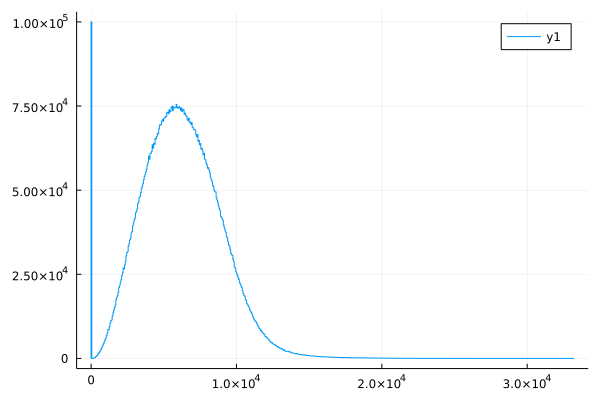

In [47]:
using Plots

histogram(ds_ss)

In [ ]:
using PyCall
pyimport("sys")."stdout" = PyTextIO(stdout)

py"""
import numpy as np
import numpy.linalg as npl

ds = []

def p(n):
    return np.array([$G.nodes[n]['soma_' + i] for i in 'xyz'])

for s, t in $G.edges():
    d = npl.norm(p(s) - p(t))
    ds.append(d)
"""
ds = py"ds";

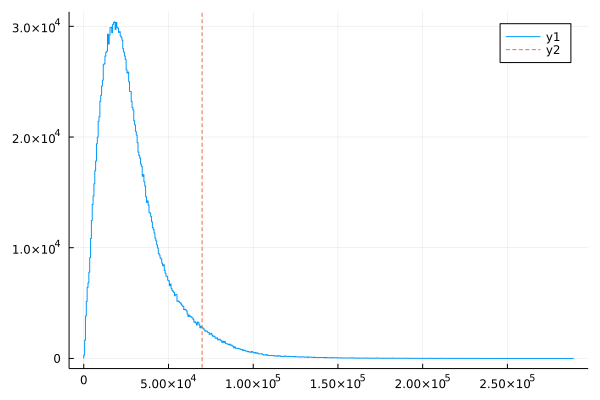

In [34]:
using Plots
using Statistics

t = quantile(ds, 0.95)
histogram(ds)
vline!([t], linestyle=:dash)

In [51]:
t = quantile(ds_ss, 0.95)
sum(ds .< t) / length(ds) * 100

13.024186532103707